## Imports

In [1]:
import numpy as np

from dataloader.load_dt_simulated import load_dt_simulated_dataset, save_dt_simulated_dataset, rotate_dt_simulated_dataset

# Simulated dataset generation

The complete synthetic dataset consists of diffusion weighted data (b-values, gradient orientations, diffusion weighted signals) and the SH expansion coefficients of the fODF which is the target. The simulation starts with sampling random fibre orientations and the corresponding volume fractions for predetermined number of fibre populations. Then given these directions and volume fractions fODF SH coefficients are generated as descibed before. Before the corresponding DW signals can be generated, the eigenvectors of the diffusion tensor need to be generated. Since the eigenvalues are provided as simulation parameters the first eigenvector is chosen to be the fibre population orientation. Then other two random vectors are sampled and by the process of Gram-Schmidt orthonormalization are transformed so that together with the first eigenvector they form an orthonormal basis. These vectors are then used as the eigenvectors of the diffusion tensor model and the corresponding diffusion-weighted signals are produced.

The following cell simulates dataset of 1000 voxels each with 2 fibre populations and maximum SH degree of 8.

In [2]:
dataset = load_dt_simulated_dataset(dataset_size=1000,
                                    number_of_fibre_populations=2,
                                    max_degree=8,
                                    fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                    number_of_data_points=90,
                                    b_value=1000,
                                    b_0_signal=3000,
                                    include_b_0=False,
                                    signal_to_noise_ratio=30,
                                    noise_type='rician',
                                    noise_generator_seed=1,
                                    gradient_generator_seed=1,
                                    fibre_orientation_generator_seed=1)

The following three sections show synthetic data for one voxel.

## SH coefficients of fODF

In [3]:
dataset[0][0]

array([ 0.28209479,  0.06192353, -0.2712074 , -0.2165312 , -0.01007259,
       -0.15952789, -0.43814622, -0.02025965,  0.03873198,  0.36915473,
        0.02807401, -0.00309869,  0.00380469,  0.27289658, -0.14681116,
        0.29809931,  0.14021601, -0.06531286,  0.05637124, -0.11197503,
       -0.30197654,  0.16974487,  0.03811946,  0.1214478 , -0.22737339,
        0.0199729 , -0.53834829,  0.05822074,  0.19546029, -0.21094007,
        0.13877934, -0.07425833,  0.34068434, -0.09310615,  0.12015208,
        0.10564028, -0.29106338, -0.07875803, -0.17599889,  0.05917967,
        0.06587996,  0.37341549,  0.12791213,  0.05426927, -0.25862614])

## b-vals, gradient orientations, signals

In [4]:
dataset[1][0]

(array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
        1000, 1000]),
 array([[ 0.36353657, -0.79057113, -0.61636162,  0.47329009, -0.82269029,
          0.89697745, -0.94988454, -0.16577181, -0.81933594, -0.8108305 ,
          0.87454161,  0.91075499, -0.29634718,  0.07737383, -0.0756303 ,
          0.18488546,  0.53113688, -0.67804166,  0.52939376, -0.0155802 ,
          0.0529998 , -0.9090384 ,  0.12865447,  0.19786134, -0.71456792,
          0.5073

## Fibre orientations

In [5]:
dataset[2][0]

array([[ 0.36353657,  0.86429949,  0.34760259],
       [-0.79057113,  0.54924163,  0.27079683]])

## Generate datasets with all directions and varying noise

### Noise-free data

In [6]:
dataset1 = load_dt_simulated_dataset(dataset_size=100000,
                                    number_of_fibre_populations=1,
                                    max_degree=8,
                                    fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                    number_of_data_points=90,
                                    b_value=1000,
                                    b_0_signal=3000,
                                    include_b_0=False,
                                    signal_to_noise_ratio=0,
                                    noise_type='none',
                                    noise_generator_seed=1,
                                    gradient_generator_seed=1,
                                    fibre_orientation_generator_seed=1)

save_dt_simulated_dataset(dataset1, './data/dt_simulated_snr_noise_free/1_populations')

In [7]:
dataset2 = load_dt_simulated_dataset(dataset_size=100000,
                                    number_of_fibre_populations=2,
                                    max_degree=8,
                                    fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                    number_of_data_points=90,
                                    b_value=1000,
                                    b_0_signal=3000,
                                    include_b_0=False,
                                    signal_to_noise_ratio=0,
                                    noise_type='none',
                                    noise_generator_seed=2,
                                    gradient_generator_seed=1,
                                    fibre_orientation_generator_seed=2)

save_dt_simulated_dataset(dataset2, './data/dt_simulated_snr_noise_free/2_populations')

In [8]:
dataset3 = load_dt_simulated_dataset(dataset_size=100000,
                                    number_of_fibre_populations=3,
                                    max_degree=8,
                                    fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                    number_of_data_points=90,
                                    b_value=1000,
                                    b_0_signal=3000,
                                    include_b_0=False,
                                    signal_to_noise_ratio=0,
                                    noise_type='none',
                                    noise_generator_seed=3,
                                    gradient_generator_seed=1,
                                    fibre_orientation_generator_seed=3)

save_dt_simulated_dataset(dataset1, './data/dt_simulated_snr_noise_free/3_populations')

### Noisy data (SNR=30, 10, 0.1, 0.05, 0.01)

In [12]:
SNRs = [30, 10, 0.1, 0.05, 0.01]
names = ['30','10','01','005','001']
numbers_of_populations = [1, 2, 3]

i = 0
j = 0

for SNR in SNRs:
    for number_of_populations in numbers_of_populations:
        
        dataset = load_dt_simulated_dataset(dataset_size=100000,
                                            number_of_fibre_populations=number_of_populations,
                                            max_degree=8,
                                            fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                            number_of_data_points=90,
                                            b_value=1000,
                                            b_0_signal=3000,
                                            include_b_0=False,
                                            signal_to_noise_ratio=SNR,
                                            noise_type='rician',
                                            noise_generator_seed=i+1,
                                            gradient_generator_seed=1,
                                            fibre_orientation_generator_seed=i+1)
        
        path = './data/dt_simulated_snr_'+names[j]+'/'+str(number_of_populations)+'_populations'
        
        save_dt_simulated_dataset(dataset, path)
        
        i += 1
    j += 1

## Generate planar dataset without noise

In [3]:
dataset = load_dt_simulated_dataset(dataset_size=100000,
                                    number_of_fibre_populations=3,
                                    max_degree=8,
                                    fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                    number_of_data_points=90,
                                    b_value=1000,
                                    b_0_signal=3000,
                                    include_b_0=False,
                                    signal_to_noise_ratio=0,
                                    noise_type='none',
                                    noise_generator_seed=2,
                                    gradient_generator_seed=2,
                                    fibre_orientation_generator_seed=2,
                                    planar=True)
        
path = './data/planar/no_rotation'
        
save_dt_simulated_dataset(dataset, path)

[[-0.99834138 -0.0575716   0.        ]
 [-0.57181506 -0.82038256  0.        ]
 [ 0.          0.          1.        ]]


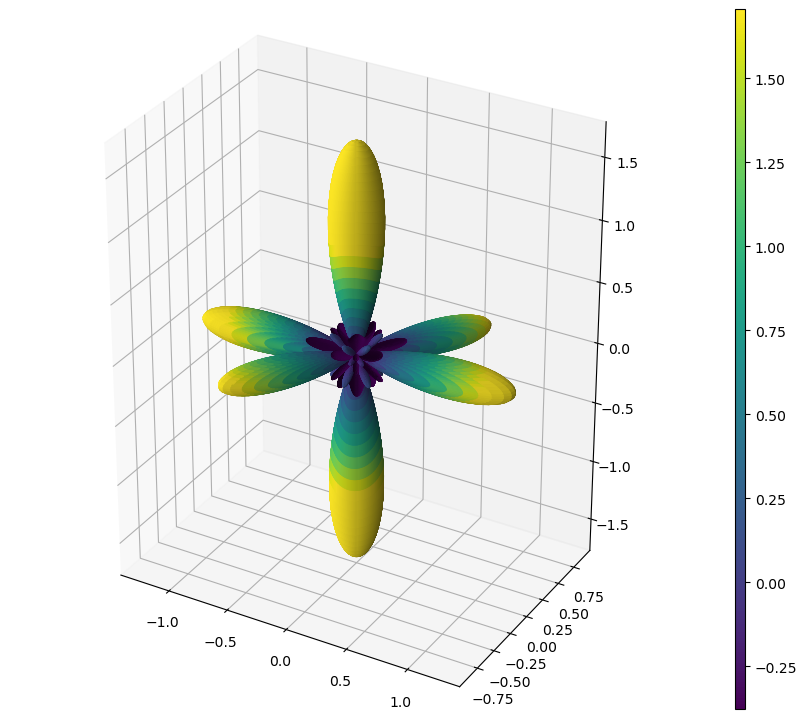

In [19]:
fODFs = np.load('./data/planar/no_rotation/fODF_sh_coefficients.npy')
fibre_orientations = np.load('./data/planar/no_rotation/fibre_orientations.npy')

print(fibre_orientations[7])

x, y, z, fcolors = get_spherical_function_values_from_spherical_expansion(fODFs[7],max_degree=8,resolution=200,min_value=None,max_value=None, normalize=False)

x = x * fcolors
y = y * fcolors
z = z * fcolors

fig = plt.figure(figsize=(10,10))

cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(fcolors), vmax=np.max(fcolors))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalization)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.viridis(fcolors), shade=True)
#ax.set_axis_off()
plt.gca().set_aspect('equal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()

## Generate rotated planar dataset without noise

In [4]:
fibre_orientations = np.load('./data/planar/no_rotation/fibre_orientations.npy')

rotated_dataset = rotate_dt_simulated_dataset(fibre_orientations,
                                              number_of_fibre_populations=3,
                                              max_degree=8,
                                              fibre_population_eigenvalues=(0.003, 0.0002, 0.0002),
                                              number_of_data_points=90,
                                              b_value=1000,
                                              b_0_signal=3000,
                                              include_b_0=False,
                                              signal_to_noise_ratio=0,
                                              noise_type='none',
                                              noise_generator_seed=2,
                                              gradient_generator_seed=2,
                                              fibre_orientation_generator_seed=2)

path_rotated_dataset = './data/planar/rotation'
        
save_dt_simulated_dataset(rotated_dataset, path_rotated_dataset)

In [3]:
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd

from models.sphericaldeconvolution.spherical_deconvolution import spherical_deconvolution_fit
from models.sphericaldeconvolution.fibre_response_function import simple_fibre_response_function, diffusion_tensor_response_function
from dataloader.load_dt_simulated import load_dt_simulated_multiple_populations
from preprocessing.data_augmentation import extend_dataset_with_origin_reflections
from preprocessing.data_transformations import convert_coords_from_cartesian_to_spherical
from visualization.spherical_functions_visualisation import get_spherical_function_values_from_spherical_expansion

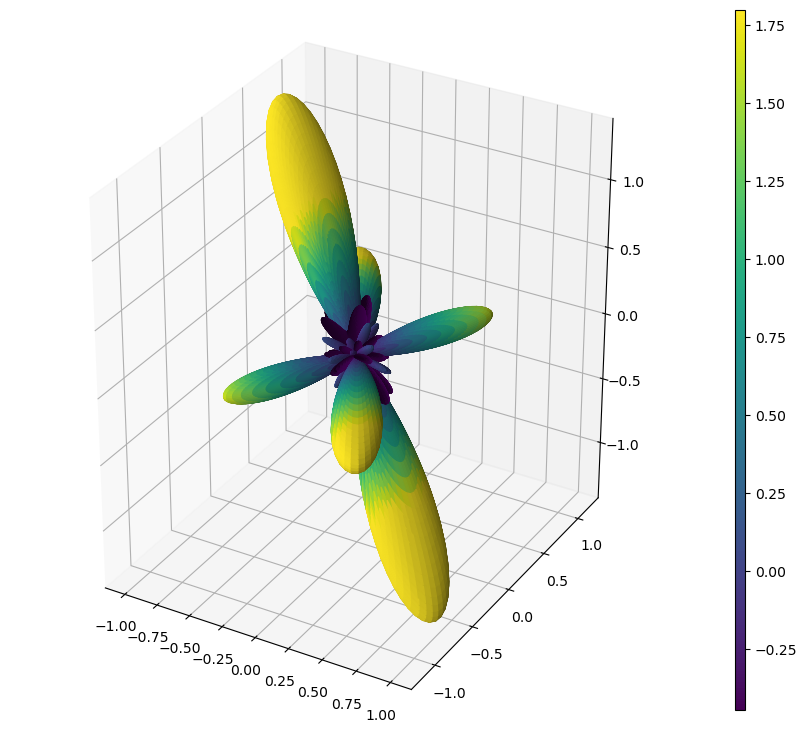

In [12]:
x, y, z, fcolors = get_spherical_function_values_from_spherical_expansion(rotated_dataset[0][7],max_degree=8,resolution=200,min_value=None,max_value=None, normalize=False)

x = x * fcolors
y = y * fcolors
z = z * fcolors

fig = plt.figure(figsize=(10,10))

cmap = plt.cm.viridis
normalization = Normalize(vmin=np.min(fcolors), vmax=np.max(fcolors))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalization)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.viridis(fcolors), shade=True)
#ax.set_axis_off()
plt.gca().set_aspect('equal')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cbar = fig.colorbar(sm, ax=[ax], cax=cbar_ax)

plt.show()